In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
import seaborn as sn

In [2]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
data = pd.read_csv('diabetes.csv',header = None,names = col_names)
print(data.shape)
data.head()

(769, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [3]:
data = data.iloc[1:]

In [4]:
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [5]:
feature_cols = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']
X = data[feature_cols]
y = data.label
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state  = 5)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(614, 7)

(614,)

(154, 7)

(154,)

In [6]:
model = LogisticRegression(solver = 'lbfgs',max_iter = 1000)

In [7]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [8]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix :" , conf_mat)
Accuracy_score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy score:',Accuracy_score)
print('Accuracy in Percentage:',int(Accuracy_score*100),'%')

Confusion Matrix : [[88 12]
 [19 35]]
Accuracy score: 0.7987012987012987
Accuracy in Percentage: 79 %


<Axes: xlabel='Predicted', ylabel='Actual'>

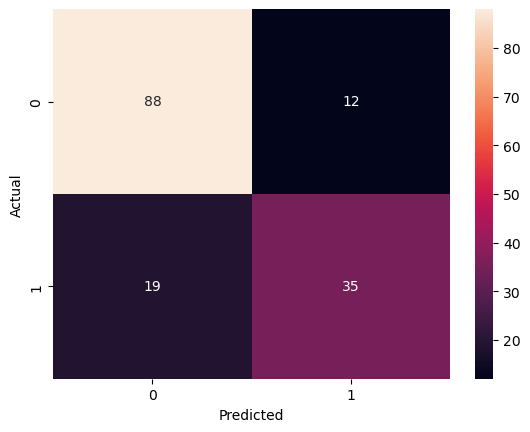

In [10]:
conf_mat = pd.crosstab(y_test,y_pred,rownames = ['Actual'],colnames = ['Predicted'])
sn.heatmap(conf_mat,annot = True)

In [ ]:
#BY SARVESH G CH.SC.U4CSE23055